## Class Notes

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2023-05-25 21:52:56.878231: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 21:52:56.930270: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 21:52:56.930900: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 21:52:58.146110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


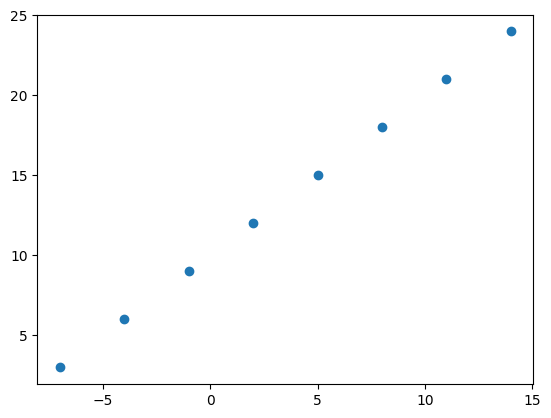

In [3]:
# Create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3,6,9,12,15,18,21,24])

# Visualize
plt.scatter(X,y)

In [4]:
y == X + 10 # What we want the model discover

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1), y, epochs=100, verbose=0)

2023-05-25 21:53:00.583156: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-25 21:53:00.656756: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model.predict([-2])

1/1 [==============================] - 0s 87ms/step


array([[8.040716]], dtype=float32)

In [7]:
X = tf.range(-100,100,4)
y = X + 10

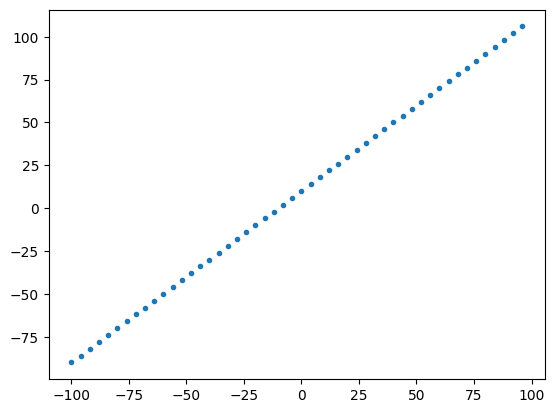

In [8]:
plt.scatter(X,y, marker='.')

In [9]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

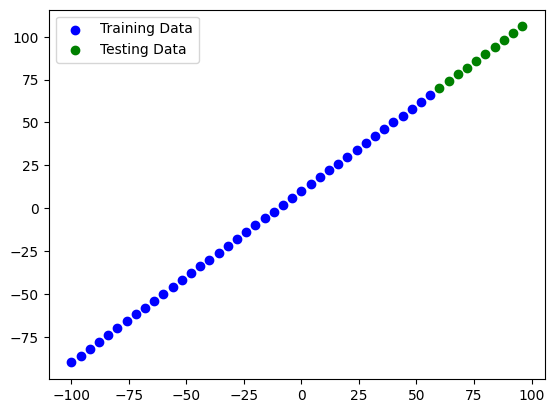

In [10]:
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.legend()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [12]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

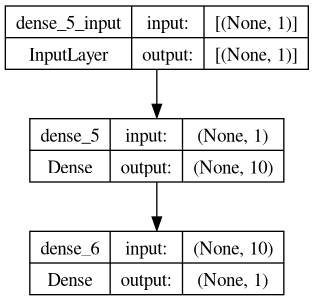

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [16]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 78.52966 ],
       [ 83.64393 ],
       [ 88.758194],
       [ 93.87245 ],
       [ 98.98672 ],
       [104.10099 ],
       [109.21525 ],
       [114.329506],
       [119.44377 ],
       [124.55804 ]], dtype=float32)

In [17]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [18]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    
    plt.scatter(train_data,train_labels,c='b',label='Training Data')
    plt.scatter(test_data,test_labels,c='g',label='Testing Data')
    plt.scatter(test_data,predictions,c='r',label='Predictions')
    plt.legend()

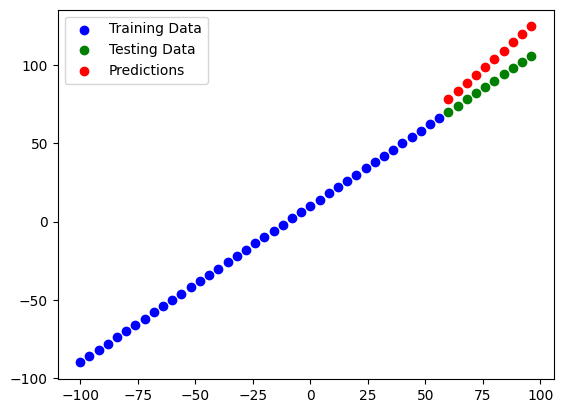

In [19]:
plot_predictions()

In [20]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 145ms/step - loss: 13.5439 - mae: 13.5439


[13.543851852416992, 13.543851852416992]

In [21]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.188135, 10.471214, 10.      , 10.77449 , 12.99203 , 16.480793,
       21.215248, 26.329504, 31.443771, 36.558037], dtype=float32)>

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
y_pred = tf.constant(y_pred)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.52966 ,  83.64393 ,  88.758194,  93.87245 ,  98.98672 ,
       104.10099 , 109.21525 , 114.329506, 119.44377 , 124.55804 ],
      dtype=float32)>

In [24]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.543851>

In [25]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=193.67896>

In [26]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 71.1311 - mae: 71.1311
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 35.8853 - mae: 35.8853
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 7.6574 - mae: 7.6574
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.7073 - mae: 9.7073
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1020 - mae: 11.1020
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2551 - mae: 10.2551
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2624 - mae: 9.2624
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1839 - mae: 9.1839
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8165 - mae: 11.8165
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7470 - mae: 13.7470
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 33ms/step


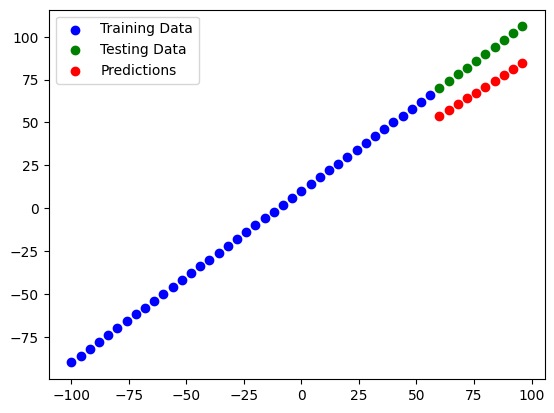

In [27]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [28]:
mae_1 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds_1))
mse_1 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.77889>,
 <tf.Tensor: shape=(), dtype=float32, numpy=354.8409>)

In [29]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss='mae',
               optimizer='sgd',
               metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 28.4434 - mse: 1275.7751
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 25.9289 - mse: 890.5018
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.9014 - mse: 1361.8973
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 14.2616 - mse: 271.5807
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 19.9781 - mse: 544.8976
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6112 - mse: 104.1753
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 16.0548 - mse: 334.4236
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 16.6141 - mse: 376.8471
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 29.0104 - mse: 1150.4902
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 13.6002 - mse: 231.0982
Epoch 11/100
2/2 [=============================

1/1 [==============================] - 0s 44ms/step


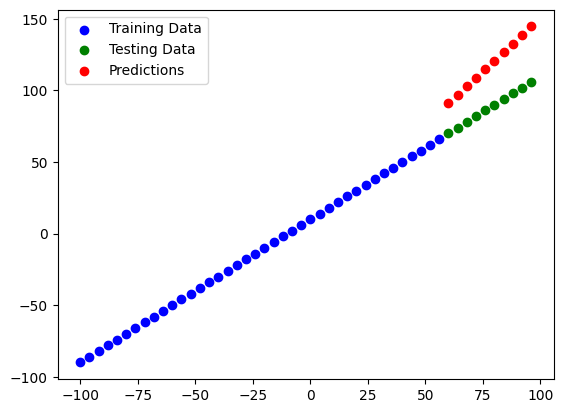

In [30]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [31]:
mae_2 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds_2))
mse_2 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.85406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=922.6043>)

In [32]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss='mae',
               optimizer='sgd',
               metrics=['mse'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 42.6178 - mse: 2602.9980
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 32.6589 - mse: 1510.0878
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 29.3358 - mse: 1284.1321
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 16.0166 - mse: 377.8746
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 22.0964 - mse: 713.0207
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.3396 - mse: 144.1119
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 12.4048 - mse: 199.7447
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0272 - mse: 142.8094
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 39.1275 - mse: 2384.6069
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 26.6917 - mse: 1001.5604
Epoch 11/500
2/2 [==========================

1/1 [==============================] - 0s 50ms/step


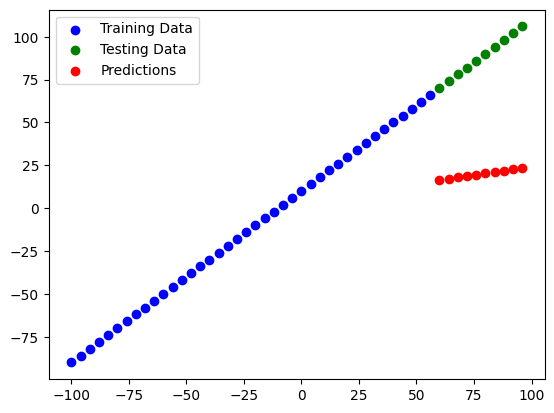

In [33]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [34]:
mae_3 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds_3))
mse_3 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.000534>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4708.956>)

In [35]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [37]:
model_2.save('best_model_HDF5_format.h5')

In [38]:
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [40]:
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [41]:
loaded_h5_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_preds

1/1 [==============================] - 0s 45ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Larger Problem

In [42]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
insurance_onehot = pd.get_dummies(insurance, dtype=int)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [44]:
# Creating X and y values
X = insurance_onehot.drop('charges', axis=1)
y = insurance_onehot['charges']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [46]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [47]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss='mae',
                        optimizer='adam',
                        metrics=['mae'])

history = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13232.9824 - mae: 13232.9824
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12592.8965 - mae: 12592.8965
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 10646.8438 - mae: 10646.8438
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7900.8711 - mae: 7900.8711
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7386.4712 - mae: 7386.4712
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7341.4111 - mae: 7341.4111
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7285.9873 - mae: 7285.9873
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7243.9951 - mae: 7243.9951
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7199.5850 - mae: 7199.5850
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7155.3970 - mae: 715

In [48]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3500.2981 - mae: 3500.2981


[3500.298095703125, 3500.298095703125]

Text(0, 0.5, 'loss')

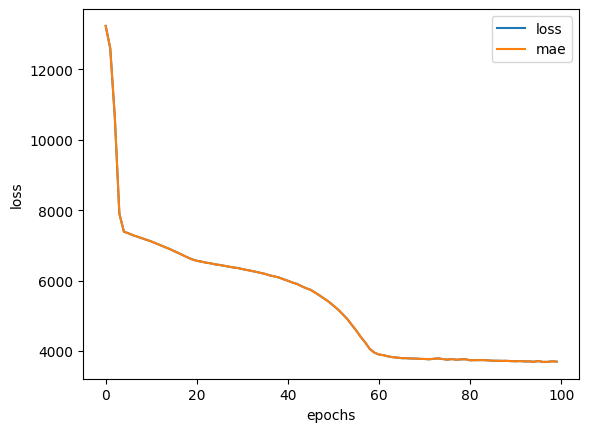

In [49]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [50]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [51]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [52]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss='mae',
                          optimizer='adam',
                          metrics=['mae'])

history = insurance_model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13339.7939 - mae: 13339.7939
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13301.2090 - mae: 13301.2090
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13168.5391 - mae: 13168.5391
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12849.6572 - mae: 12849.6572
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12240.9717 - mae: 12240.9717
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 11291.7861 - mae: 11291.7861
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 10200.0400 - mae: 10200.0400
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9178.8652 - mae: 9178.8652
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8468.3086 - mae: 8468.3086
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8075.3232 - 

In [53]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3162.9102 - mae: 3162.9102


[3162.91015625, 3162.91015625]

Text(0.5, 0, 'epochs')

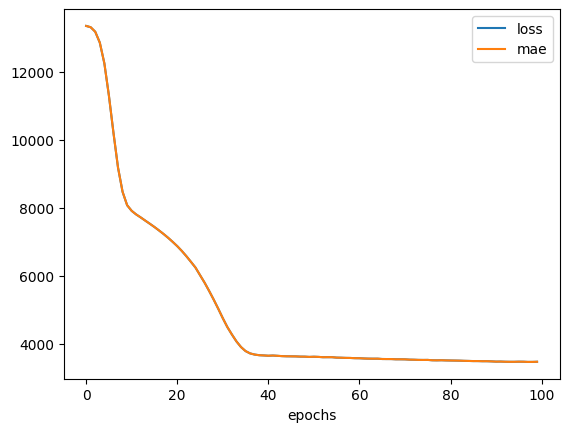

In [54]:
pd.DataFrame(history.history).plot() # loss = mae
plt.xlabel('epochs')

In [55]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


## Exercises

Epoch 1/100
1/1 [==============================] - 1s 819ms/step - loss: 18.0162 - mse: 504.8930
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 16.7605 - mse: 440.9068
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 15.5279 - mse: 383.0261
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 14.2916 - mse: 330.2493
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1282 - mse: 282.0256
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9745 - mse: 238.2438
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9256 - mse: 198.7634
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0101 - mse: 164.0790
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4792 - mse: 135.0362
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4826 - mse: 113.5349
Epoch 11/100
1/1 [==============================]

Text(0.5, 0, 'epochs')

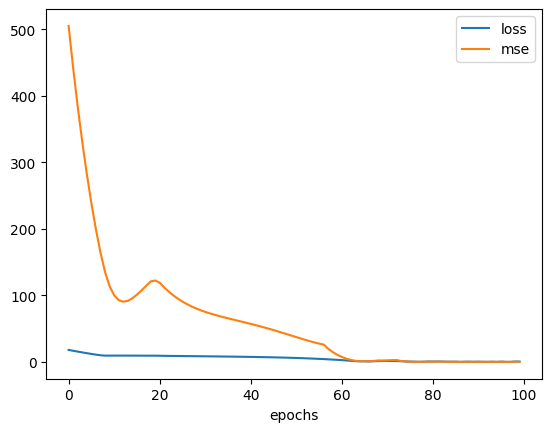

In [88]:
# 1, 2, 3
X = np.arange(-10,10,1)
y = 3*X -10

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model.compile(loss='mae',
              optimizer='adam',
              metrics=['mse'])

history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

pd.DataFrame(history.history).plot()
plt.xlabel('epochs')


In [100]:
# 4
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2
)

X_train.shape, y_train.shape

((404, 13), (404,))

In [116]:
tf.expand_dims(y_train, axis=-1)

<tf.Tensor: shape=(404, 1), dtype=float64, numpy=
array([[15.2],
       [42.3],
       [50. ],
       [21.1],
       [17.7],
       [18.5],
       [11.3],
       [15.6],
       [15.6],
       [14.4],
       [12.1],
       [17.9],
       [23.1],
       [19.9],
       [15.7],
       [ 8.8],
       [50. ],
       [22.5],
       [24.1],
       [27.5],
       [10.9],
       [30.8],
       [32.9],
       [24. ],
       [18.5],
       [13.3],
       [22.9],
       [34.7],
       [16.6],
       [17.5],
       [22.3],
       [16.1],
       [14.9],
       [23.1],
       [34.9],
       [25. ],
       [13.9],
       [13.1],
       [20.4],
       [20. ],
       [15.2],
       [24.7],
       [22.2],
       [16.7],
       [12.7],
       [15.6],
       [18.4],
       [21. ],
       [30.1],
       [15.1],
       [18.7],
       [ 9.6],
       [31.5],
       [24.8],
       [19.1],
       [22. ],
       [14.5],
       [11. ],
       [32. ],
       [29.4],
       [20.3],
       [24.4],
       [14.6],
     

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 65.6723 - mae: 65.6723
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 19.0164 - mae: 19.0164
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 12.0774 - mae: 12.0774
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 10.1055 - mae: 10.1055
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 9.3860 - mae: 9.3860
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 8.8946 - mae: 8.8946
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 7.4950 - mae: 7.4950
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 6.0963 - mae: 6.0963
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 6.8995 - mae: 6.8995
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 6.5987 - mae: 6.5987
Epoch 11/50
13/13 [==============================] - 0s 2ms/s

Text(0.5, 0, 'epochs')

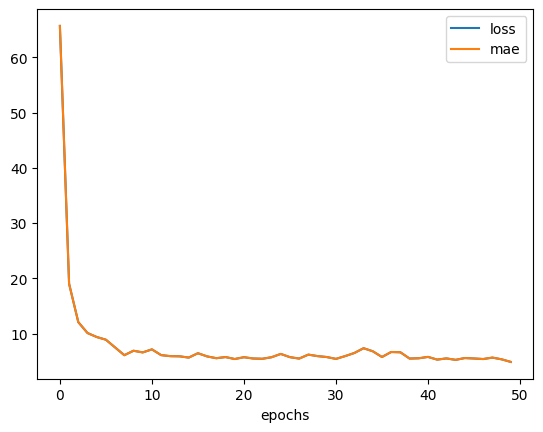

In [136]:
model_boston = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1),
])

model_boston.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

history = model_boston.fit(X_train, y_train, epochs=50)

pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
